In [2]:
require(data.table)
require(tidyverse)

## 1. Read data 
From [Binary_comp](./Binary_comp.ipynb)

In [3]:
res.transcript_level<- readRDS("../dat/1901/res.transcript_level.rds")

### 1.1 Alpha data

Loading required package: ggExtra


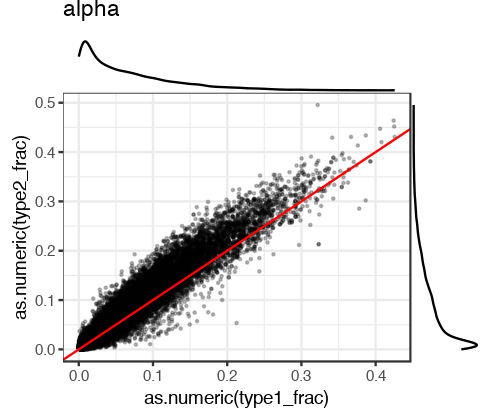

In [4]:
options(repr.plot.width=4, repr.plot.height=3.5)
require(ggExtra)
p <- ggplot(res.transcript_level$alpha, aes(as.numeric(type1_frac),
                                      as.numeric(type2_frac))) +
    geom_point(alpha=.25,size=.25) + theme_bw()+
    geom_abline(slope = 1,intercept = 0,color='red')+ggtitle("alpha")
# add marginal histograms
ggExtra::ggMarginal(p, type = "density")

### 1.2 beta data

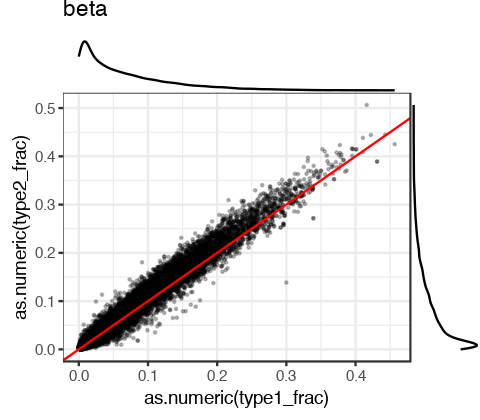

In [5]:
options(repr.plot.width=4, repr.plot.height=3.5)
require(ggExtra)
p <- ggplot(res.transcript_level$beta, aes(as.numeric(type1_frac),
                                      as.numeric(type2_frac))) +
    geom_point(alpha=.25,size=.25) + theme_bw()+
    geom_abline(slope = 1,intercept = 0,color='red')+ggtitle("beta")
# add marginal histograms
ggExtra::ggMarginal(p, type = "density")

## 2 alpha Cells

### 2.1 odds  + padj thresholding

Loading required package: LSD


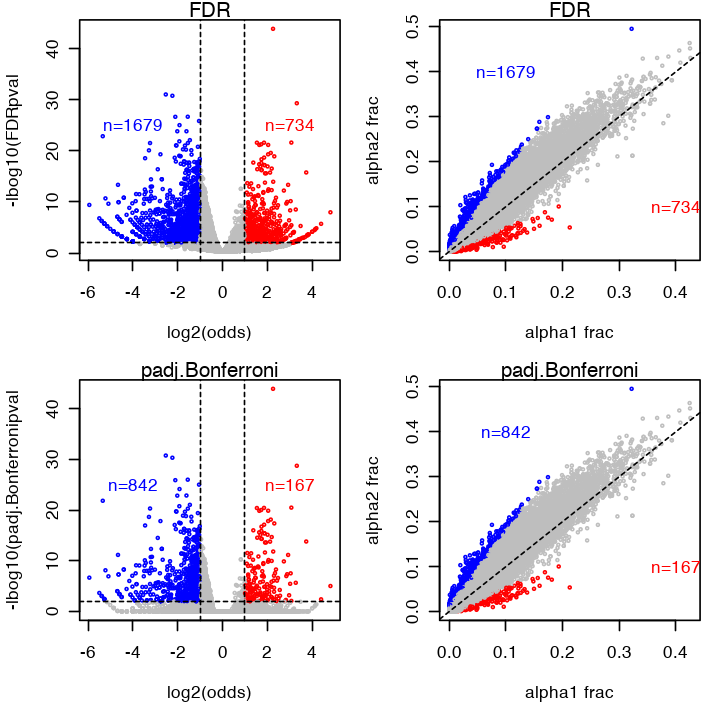

In [6]:
require(ggplot2)
options(repr.plot.width=6, repr.plot.height=6)
require(LSD)
res.genes_level.a.df <- res.transcript_level$alpha
par(mar=c(5,4,1,1),mfrow = c(2,2))
for(m in c("FDR","padj.Bonferroni")){
    up<- res.genes_level.a.df[,m] <0.01 & log2(res.genes_level.a.df$odds)>1
    down<-res.genes_level.a.df[,m] <0.01 & log2(res.genes_level.a.df$odds)< -1
plot(x=log2(res.genes_level.a.df$odds),y=-log10(as.numeric(res.genes_level.a.df[,m])),
     xlab = "log2(odds)",ylab=paste0('-lbog10(',m,'pval'),cex=.25,
     col=ifelse(up,"red",ifelse(down,"blue","grey")),
     main = m)
abline(h = 2,col=1,lty=2)
abline(v=c(-1,1),col=1,lty=2)
text(-4,25,col='blue',labels = paste0("n=",sum(down)))
text(3,25,col='red',labels = paste0("n=",sum(up)))

# scatter 
plot(x=as.numeric(res.genes_level.a.df$type1_frac),y=as.numeric(res.genes_level.a.df$type2_frac),
     xlab = "alpha1 frac",ylab='alpha2 frac',cex=.25,
     col=ifelse(up,"red",ifelse(down,"blue","grey")),
     main = m)
abline(a=0,b = 1,col=1,lty=2)
text(.1,.4,col='blue',labels = paste0("n=",sum(down)))
text(.4,.1,col='red',labels = paste0("n=",sum(up)))
}



# MAplot
if(F){
    plot(y=log2(res.genes_level.a.df$odds),x=as.numeric(res.genes_level.a.df$type1_frac),
            ylab = "log2(odds)",xlab='apha1 frac',cex=.25,col='grey',pch=16,
            main = '')

    abline(h = c(-1,1),col=2,lty=2)

}

#ggplot(res.genes_level.a.df,aes(odds,-log10(FDR)))+geom_point()

### 2.2 remove odds thresholding give more high genes at the high opening fractions 
**The odds thresholding will remove the genes appeared on large fraction** 

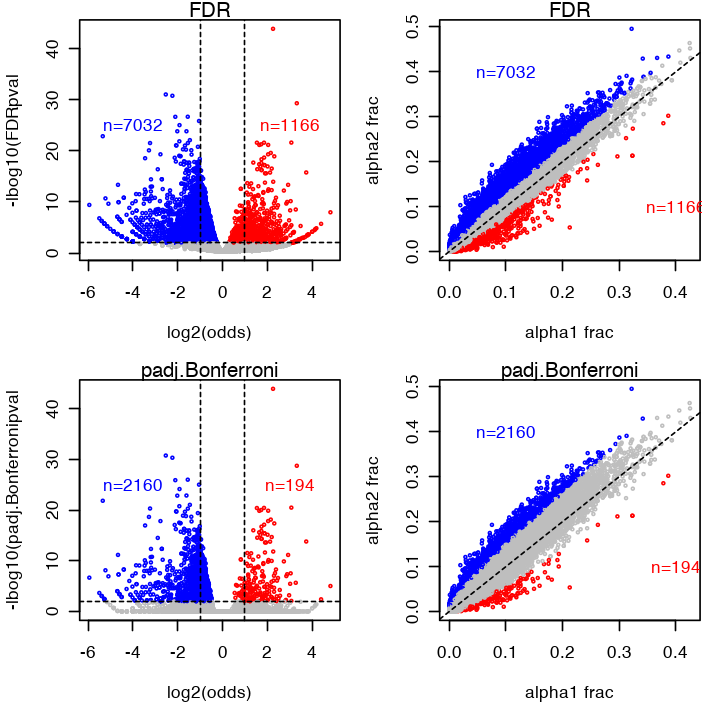

In [7]:
# without ODDs threshold
require(ggplot2)
options(repr.plot.width=6, repr.plot.height=6)
require(LSD)
res.genes_level.a.df <- res.transcript_level$alpha
par(mar=c(5,4,1,1),mfrow = c(2,2))
for(m in c("FDR","padj.Bonferroni")){
    up<- res.genes_level.a.df[,m] <0.01 & res.genes_level.a.df[,"odds"]>1
    down<-res.genes_level.a.df[,m] <0.01 & res.genes_level.a.df[,"odds"]<1
plot(x=log2(res.genes_level.a.df$odds),y=-log10(as.numeric(res.genes_level.a.df[,m])),
     xlab = "log2(odds)",ylab=paste0('-lbog10(',m,'pval'),cex=.25,
     col=ifelse(up,"red",ifelse(down,"blue","grey")),
     main = m)
abline(h = 2,col=1,lty=2)
abline(v=c(-1,1),col=1,lty=2)
text(-4,25,col='blue',labels = paste0("n=",sum(down)))
text(3,25,col='red',labels = paste0("n=",sum(up)))

# scatter 
plot(x=as.numeric(res.genes_level.a.df$type1_frac),y=as.numeric(res.genes_level.a.df$type2_frac),
     xlab = "alpha1 frac",ylab='alpha2 frac',cex=.25,
     col=ifelse(up,"red",ifelse(down,"blue","grey")),
     main = m)
abline(a=0,b = 1,col=1,lty=2)
text(.1,.4,col='blue',labels = paste0("n=",sum(down)))
text(.4,.1,col='red',labels = paste0("n=",sum(up)))
}



### 2.3 select genes 

In [17]:
binary.glist <- list()
m<-"padj.Bonferroni"

## alpha
res.genes_level.a.df<- res.transcript_level$alpha
up<- res.genes_level.a.df[,m] <0.01 & res.genes_level.a.df[,"odds"]>1
down<-res.genes_level.a.df[,m] <0.01 & res.genes_level.a.df[,"odds"]<1
binary.glist$alpha1_tr <- rownames(res.genes_level.a.df)[up]
binary.glist$alpha1 <- sapply(rownames(res.genes_level.a.df)[up],function(x) unlist(strsplit(x,split = "_"))[1])
binary.glist$alpha2 <- sapply(rownames(res.genes_level.a.df)[down],function(x) unlist(strsplit(x,split = "_"))[1])
binary.glist$alpha2_tr <- rownames(res.genes_level.a.df)[down]                             

binary.glist$alpha1 <- unique(binary.glist$alpha1)
binary.glist$alpha2 <- unique(binary.glist$alpha2)

## beta                             
res.genes_level.a.df<- res.transcript_level$beta
up<- res.genes_level.a.df[,m] <0.01 & res.genes_level.a.df[,"odds"]>1
down<-res.genes_level.a.df[,m] <0.01 & res.genes_level.a.df[,"odds"]<1
binary.glist$beta1_tr <- rownames(res.genes_level.a.df)[up]
binary.glist$beta1<- sapply(rownames(res.genes_level.a.df)[up],function(x) unlist(strsplit(x,split = "_"))[1])
binary.glist$beta2<- sapply(rownames(res.genes_level.a.df)[down],function(x) unlist(strsplit(x,split = "_"))[1])
binary.glist$beta2_tr <- rownames(res.genes_level.a.df)[down]                             
binary.glist$beta1 <- unique(binary.glist$beta1)
binary.glist$beta2 <- unique(binary.glist$beta2)

saveRDS(binary.glist,file = '../dat/1901/binary.glist.Rds')
t(unlist(lapply(binary.glist,length)))

alpha1_tr,alpha1,alpha2,alpha2_tr,beta1_tr,beta1,beta2,beta2_tr
194,186,2071,2160,186,181,703,721


### 2.4 prepare genes for go

In [5]:
binary.glist <- readRDS('../dat/1901/binary.glist.Rds')

In [6]:
binary.glist$alpha1

[1] "SKI"          "KAZN"         "SLC25A34"     "FBLIM1"       "AK2"         
  [6] "TMCO2"        "TTC39A"       "C1orf168"     "AK5"          "MYBPHL"      
 [11] "AHCYL1"       "AL136376.1"   "PDZK1"        "TPM3"         "ATP1B1"      
 [16] "CEP350"       "EPHX1"        "ADCK3"        "MYO3A"        "PDSS1"       
 [21] "ARMC4"        "TMEM72"       "RASSF4"       "PCDH15"       "CCDC6"       
 [26] "CAMK2G"       "PIK3AP1"      "PYROXD2"      "RBM20"        "CACUL1"      
 [31] "OAT"          "CTBP2"        "MMP26"        "APBB1"        "ABCC8"       
 [36] "ARHGAP1"      "SYT7"         "FADS2"        "PELI3"        "DLG2"        
 [41] "BACE1"        "C11orf45"     "GALNT8"       "KCNA5"        "PTPN6"       
 [46] "EMG1"         "KLHL42"       "FGD4"         "SYT10"        "TCP11L2"     
 [51] "UBE3B"        "MVK"          "BRAP"         "TPCN1"        "PXN"         
 [56] "EPSTI1"       "SMIM2"        "PCDH17"       "LMO7"         "FARP1"       
 [61] "F7"           "OR4N2"        "ARHGEF40"     "SLC7A8"       "DHRS2"       
 [66] "REC8"         "TRIM9"        "DAAM1"        "GSTZ1"        "ADCK1"       
 [71] "GPR68"        "SMEK1"        "CHGA"         "CORO2B"       "TLE3"        
 [76] "C15orf39"     "CBFB"         "VAC14"        "ZZEF1"        "TP53I13"     
 [81] "SLC6A4"       "COG1"         "LLGL2"        "SEPT9"        "SLC38A10"    
 [86] "KCTD1"        "TTR"          "FHOD3"        "FBXO15"       "MBOAT7"      
 [91] "RSAD2"        "FAM179A"      "CLIP4"        "MEIS1"        "POLR1A"      
 [96] "TBC1D8"       "ACVR1"        "GCG"          "ZNF385B"      "CERKL"       
[101] "NEUROD1"      "CCDC150"      "LANCL1"       "SPAG16"       "FEV"         
[106] "PSMF1"        "C20orf196"    "ISM1"         "CDH22"        "C21orf58"    
[111] "ARVCF"        "SFI1"         "SREBF2"       "GRM7"         "RBM5"        
[116] "HTR1F"        "BOC"          "HEG1"         "P2RY14"       "TIPARP"      
[121] "TTC14"        "CTBP1"        "STX18"        "ABLIM2"       "SH3TC1"      
[126] "SLC2A9"       "PPARGC1A"     "SEPSECS"      "CCKAR"        "LIMCH1"      
[131] "DCUN1D4"      "MAPK10"       "MMRN1"        "BANK1"        "ANK2"        
[136] "PHF17"        "INPP4B"       "ETFDH"        "EMB"          "RAB3C"       
[141] "MAST4"        "ARRDC3"       "SEMA6A"       "LOX"          "SIL1"        
[146] "ANXA6"        "TENM2"        "WWC1"         "STC2"         "HIST1H2BD"   
[151] "MTCH1"        "MLIP"         "EYS"          "KHDC1"        "RP11-257K9.8"
[156] "SCML4"        "MICAL1"       "RFX6"         "NCOA7"        "SLC29A4"     
[161] "VPS41"        "PGAM2"        "GCK"          "DDC"          "NUPR1L"      
[166] "ZNF736"       "MDH2"         "TMEM130"      "CDHR3"        "LAMB4"       
[171] "SND1"         "FAM167A"      "ZDHHC2"       "SLC7A2"       "ST18"        
[176] "SYBU"         "SLC30A8"      "DEPTOR"       "MTSS1"        "NDRG1"       
[181] "FAM135B"      "AQP7"         "WDR34"        "FAM73B"       "CACFD1"      
[186] "SH3KBP1"

In [7]:
require(biomaRt)

Loading required package: biomaRt


In [8]:
ensembl = useEnsembl(biomart="ensembl", dataset="hsapiens_gene_ensembl")

In [12]:
for(i in c("alpha1","alpha2","beta1","beta2")){
    fn <- paste0("../dat/1901/glist_",i,".csv")
    fwrite(getBM(attributes=c('ensembl_gene_id','hgnc_symbol'), 
                 filters ='hgnc_symbol', values = binary.glist[[i]] , mart = ensembl),file=fn)
}
